<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and regression trees (CARTs)

---

## Learning Objectives

### Core
- Gain intuition for what decision trees do through example
- Describe the difference between classification and regression trees and how to interpret these models
- Learn how decision trees are fit via pseudocode
- Understand the concept of purity
- Learn some basic strategies to prevent overfitting when using decision trees
- Understand the advantages and disadvantages of using CARTs

### Target
- Learn how to visualize the nodes of a decision tree with python

### Stretch
- Explain the equations of entropy and Gini impurity and how they relate to the misclassification error


<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li><li><span><a href="#Stretch" data-toc-modified-id="Stretch-1.3">Stretch</a></span></li></ul></li><li><span><a href="#Introduction-to-CARTs" data-toc-modified-id="Introduction-to-CARTs-2">Introduction to CARTs</a></span></li><li><span><a href="#Example-decision-tree:-did-you-play-golf?" data-toc-modified-id="Example-decision-tree:-did-you-play-golf?-3">Example decision tree: did you play golf?</a></span></li><li><span><a href="#Hierarchical-decisions:-20-Questions" data-toc-modified-id="Hierarchical-decisions:-20-Questions-4">Hierarchical decisions: 20 Questions</a></span></li><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-5">Decision Tree Classifier</a></span><ul class="toc-item"><li><span><a href="#Feature-importances" data-toc-modified-id="Feature-importances-5.1">Feature importances</a></span></li></ul></li><li><span><a href="#Decision-Tree-Regressor" data-toc-modified-id="Decision-Tree-Regressor-6">Decision Tree Regressor</a></span></li><li><span><a href="#Properties-of-decision-trees" data-toc-modified-id="Properties-of-decision-trees-7">Properties of decision trees</a></span></li><li><span><a href="#Directed-Acyclic-Graphs-(DAG)" data-toc-modified-id="Directed-Acyclic-Graphs-(DAG)-8">Directed Acyclic Graphs (DAG)</a></span><ul class="toc-item"><li><span><a href="#Binary-and-multi-way-splits" data-toc-modified-id="Binary-and-multi-way-splits-8.1">Binary and multi-way splits</a></span></li><li><span><a href="#Continuous-measure-decisions-(regression-trees)" data-toc-modified-id="Continuous-measure-decisions-(regression-trees)-8.2">Continuous measure decisions (regression trees)</a></span></li><li><span><a href="#General-DAG-example" data-toc-modified-id="General-DAG-example-8.3">General DAG example</a></span></li></ul></li><li><span><a href="#Building-a-decision-tree" data-toc-modified-id="Building-a-decision-tree-9">Building a decision tree</a></span><ul class="toc-item"><li><span><a href="#Pseudocode-classification-decision-tree-algorithm" data-toc-modified-id="Pseudocode-classification-decision-tree-algorithm-9.1">Pseudocode classification decision tree algorithm</a></span></li></ul></li><li><span><a href="#Optimization-and-&quot;purity&quot;-in-classification" data-toc-modified-id="Optimization-and-&quot;purity&quot;-in-classification-10">Optimization and "purity" in classification</a></span><ul class="toc-item"><li><span><a href="#Purity-objective-function" data-toc-modified-id="Purity-objective-function-10.1">Purity objective function</a></span></li><li><span><a href="#Common-purity-functions-(classification)" data-toc-modified-id="Common-purity-functions-(classification)-10.2">Common purity functions (classification)</a></span></li><li><span><a href="#Optimization-and-&quot;purity&quot;-in-regression" data-toc-modified-id="Optimization-and-&quot;purity&quot;-in-regression-10.3">Optimization and "purity" in regression</a></span></li></ul></li><li><span><a href="#Plotting-decision-trees" data-toc-modified-id="Plotting-decision-trees-11">Plotting decision trees</a></span><ul class="toc-item"><li><span><a href="#Classification-tree" data-toc-modified-id="Classification-tree-11.1">Classification tree</a></span><ul class="toc-item"><li><span><a href="#Interpreting-the-information-in-the-nodes" data-toc-modified-id="Interpreting-the-information-in-the-nodes-11.1.1">Interpreting the information in the nodes</a></span></li><li><span><a href="#Check-Gini-values" data-toc-modified-id="Check-Gini-values-11.1.2">Check Gini values</a></span></li></ul></li><li><span><a href="#Regression-tree" data-toc-modified-id="Regression-tree-11.2">Regression tree</a></span><ul class="toc-item"><li><span><a href="#Interpreting-the-information-in-the-nodes" data-toc-modified-id="Interpreting-the-information-in-the-nodes-11.2.1">Interpreting the information in the nodes</a></span></li><li><span><a href="#Check-a-few-of-the-MSEs-and-predicted-values" data-toc-modified-id="Check-a-few-of-the-MSEs-and-predicted-values-11.2.2">Check a few of the MSEs and predicted values</a></span></li></ul></li></ul></li><li><span><a href="#Regression-trees-and-varying-depth" data-toc-modified-id="Regression-trees-and-varying-depth-12">Regression trees and varying depth</a></span></li><li><span><a href="#Addressing-overfitting" data-toc-modified-id="Addressing-overfitting-13">Addressing overfitting</a></span></li><li><span><a href="#CART-advantages" data-toc-modified-id="CART-advantages-14">CART advantages</a></span></li><li><span><a href="#CART-disadvantages" data-toc-modified-id="CART-disadvantages-15">CART disadvantages</a></span></li></ul></div>

## Introduction to CARTs

---

Decision trees are a widely popular and powerful machine learning technique for both classification and regression problems.

To perform classification or regression, decision trees make sequential, hierarchical decisions about the outcome variable based on the predictor data.

---

[Classification CART documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

[Regression CART documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

[Decision tree user guide](http://scikit-learn.org/stable/modules/tree.html)



## Example decision tree: did you play golf?

---

![deciding to play golf](./images/golf-tree.png)

## Hierarchical decisions: 20 Questions

---

In the game "20 Questions," an individual or group has the opportunity to identify an unknown object by asking a series of up to twenty "yes" or "no" questions.

For example, suppose that I am trying to guess the item "marker." I might ask a series of questions like:
- Is the object in this room? (Yes.)
- Is the object within five feet of me? (Yes.)
- Is the object larger than a loaf of bread? (No.)
- Is there only one of these objects in the room? (No.)
- Do you hold this object when you use it? (Yes.)
- Is the object a pen? (No.)
- Is the object a book? (No.)
- Is the object a marker? (Yes!)

We can think about all possible "target objects" and then ask questions that help us to quickly pare down the number of objects so that we can identify the true target in twenty or fewer questions.

**When playing this game, what are some good strategies? What about poor strategies?**

In [1]:
import sklearn.datasets as datasets
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd

## Decision Tree Classifier

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
# load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    stratify=y, random_state=1)

In [4]:
# fit and evaluate the decision tree classifier
classifier = DecisionTreeClassifier(criterion='gini',
                                    max_depth=None, 
                                    random_state=1)
classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(cross_val_score(classifier, X_train, y_train, cv=5).mean())
print(classifier.score(X_test, y_test))

1.0
0.9333333333333332
0.9666666666666667


We made use of the following optional arguments to be discussed later:

- `criterion`: splitting decision function, can be `'gini'` or `'entropy'`
- `max_depth`: the maximum number of hierarchical decision nodes (how "deep" the tree is built)

### Feature importances

Decision trees can give us feature importances. The higher the number the more important the predictor was for deciding splits at nodes.
Technically, "the importance of a feature is computed as the (normalized) total reduction of the
criterion brought by that feature." 

That means a feature is more important 

- if it is used in many different nodes, 
- if the difference in the measures of Gini or entropy are before and after the split is high

Feature importances are normalized in the sense of summing up to one.
The features importances can be extracted from the fitted model with the attribute `.feature_importances_`.

In [5]:
pd.DataFrame(list(zip(iris.feature_names, classifier.feature_importances_)), 
             columns=['Feature', 'Importance']
            ).sort_values(by='Importance', ascending=False)

,Feature,Importance
3,petal width (cm),0.553453
2,petal length (cm),0.413213
0,sepal length (cm),0.033333
1,sepal width (cm),0.000000


## Decision Tree Regressor

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
# load the data
boston = datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

In [8]:
# fit the model
regressor = DecisionTreeRegressor(criterion='mse',
                                  max_depth=5, 
                                  random_state=1)

regressor.fit(X_train, y_train)
print(regressor.score(X_train, y_train))
print(cross_val_score(regressor, X_train, y_train, cv=5).mean())
print(regressor.score(X_test, y_test))

0.9223496204892955
0.8002020282452076
0.7107788494183549


In [9]:
# feature importances
feature_importances = regressor.feature_importances_
pd.DataFrame(list(zip(boston.feature_names, regressor.feature_importances_)), 
             columns=['Feature', 'Importance']
            ).sort_values(by='Importance', ascending=False)

,Feature,Importance
12,LSTAT,0.565060
5,RM,0.282047
7,DIS,0.073531
4,NOX,0.030746
10,PTRATIO,0.020502
0,CRIM,0.019223
2,INDUS,0.006621
3,CHAS,0.002110
11,B,0.000160
1,ZN,0.000000


## Properties of decision trees

---

Decision tree models are **hierarchical** and **non-parametric**.

**Hierarchical** means that the model is defined by a sequence of questions which yield a class label or value when applied to any observation. Once trained, the model behaves like a recipe, a series of "if this then that" conditions that yields a specific result for our input data.

**Non-parametric** methods stand in contrast to models like logistic regression or ordinary least squares regression. There are no underlying assumptions about the distribution of the data or the errors. Non-parametric models start with no _assumed_ parameters about the data.

## Directed Acyclic Graphs (DAG)

---

CART models are in fact a special case of [Directed Acyclic Graphs (DAG).](http://www.statisticshowto.com/directed-acyclic-graph/) 

DAGs have **nodes** and **edges**. In the golf example above, the nodes represent the decision points about the output variable given the predictors, and the edges are the "paths" between nodes that represent answers to the questions.

The **acyclic** part of DAGs means that the edges do not cycle back on themselves.

- The top node is called the **root node**. It has no incoming edges, and at least two outgoing edges. 
- Internal nodes test a condition on a specific feature. They have one incoming edge, and at least two outgoing edges. 
- A **leaf node** contains a class label (or regression value). It has one incoming edge and no outgoing edges.

### Binary and multi-way splits

---

![multi-way](./images/multi-way.png)

### Continuous measure decisions (regression trees)

---

![continuous trees](./images/Continuous-features.png)

### General DAG example

---

![DAG example](https://upload.wikimedia.org/wikipedia/commons/0/08/Directed_acyclic_graph.png)

## Building a decision tree

---

Building decision trees requires algorithms capable of determining an optimal choice at each node. 

One such algorithm is [**Hunt's algorithm**](http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/lguo/decisionTree.html). This is a greedy, recursive algorithm that leads to a local optimum:

- [**Greedy:**](https://en.wikipedia.org/wiki/Greedy_algorithm) the algorithm makes the most optimal decision it can at each step.
- [**Recursive:**](https://en.wikipedia.org/wiki/Recursion) the algorithm splits tasks into subtasks and solves each in the same way.
- [**Local optimum:**](https://en.wikipedia.org/wiki/Local_optimum) the algorithm finds a solution just for the given neighborhood of points.

The algorithm works by recursively partitioning records into smaller and smaller subsets. The partitioning decision is made at each node according to a metric called **purity.** A node is said to be 100% pure when all of its records belong to a single class (or have the same value).

### Pseudocode classification decision tree algorithm

---

    Given a set of records Dt at node t:
        If all records in Dt belong to the same class: 
            t is a leaf node corresponding to that class (Base case)
        Else if Dt contains records from diverse classes:
            Create test condition to partition the observations
            Define t as an internal node, with outgoing edges to child nodes
            partition records in Dt with conditional test logic to child nodes
            Recursively apply steps at each child node.

- Splits can be binary or multi-way
- Features can be categorical or continuous

## Optimization and "purity" in classification

---

Recall from the algorithm above we iteratively create test conditions to split the data and to arrive at node $t$. 

In a binary classification task, the lowest purity is reached if both classes have the same probability given node $t$:

$$ p(0|t) = p(1|t) = 0.5 $$

Maximum purity, on the other hand, is when only one class is present in node $t$, e.g. all observations in the node belong to class $0$: 

$$ p(0|t) = 1 – p(1|t) = 1 $$

### Purity objective function

To achieve maximum purity we need an **objective function** to optimize. 

We want our objective function to measure the **gain in purity** from a particular split. 
Therefore we look at the number of observations belonging to each class in the parent node (before the split) and in the child nodes (after the split). Then we measure the difference between the purity of the parent node and the sum of the purity of all the child nodes weighted by the number of observations contained in each. We would like to find the split which leads to the largest difference.

We then define an impurity function that will smoothly vary between the two extreme cases of minimum impurity (one class or the other only) and the maximum impurity case as an equal mix.

### Common purity functions (classification)

---

$$
\begin{eqnarray*}
{\rm Entropy} &=& -\frac{1}{2} \sum_{i=1}^{\rm \#\, of classes} p(i\;|\;t) \;\log_2 \; p(i\;|\;t) \\
{\rm Gini} &=& \sum_{i=1}^{\rm \#\, of classes} p(i\;|\;t)(1 -p(i\;|\;t)) = 1 - \sum_{i=1}^{\rm \#\, of classes} p(i\;|\;t)^2 
\end{eqnarray*}
$$

The Gini impurity is primarily used in the CART algorithm, but both Gini and Entropy are available in sklearn's classification and decision tree models.

![](./images/decision-tree-criteria.png)

Impurity measures on their own are not enough to tell us how a split will do. We need to look at impurity **before and after** the split. We can make this comparison using what is called the **gain**: 

$$ \Delta = I(\text{parent}) - \sum_{j=1}^{\rm \#\, of child nodes}\frac{N_j}{N}I({\rm child}_j) $$

where $I$ is the impurity measure, $N_j$ denotes the number of records at child node $j$, and $N$ denotes the number of records at the parent node. When $I$ is the [**entropy function**](https://en.wikipedia.org/wiki/Binary_entropy_function), this quantity is called the [**information gain**](https://en.wikipedia.org/wiki/Information_gain_in_decision_trees).

**[Nice example of how misclassification error can break branching.](http://sebastianraschka.com/faq/docs/decisiontree-error-vs-entropy.html)**

### Optimization and "purity" in regression

In regression decision tree splits should lead to a maximal reduction of the mean squared error. Each node will predict the mean value of the target variable of the observations contained in that node for all of those observations. At the root node, this will give the baseline score, at each subsequent step a better and better score will be reached.  

## Plotting decision trees

**Library Note**

In order to run the below on your machine you may have to install or update a few new packages.

**Pydotplus**
```
conda install -c anaconda pydotplus
```

and its dependency

**Graphviz**
```
brew install graphviz
```

If you have not yet installed [homebrew](https://brew.sh), run 

```
/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
```



In [10]:
import warnings
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

from ipywidgets import *
from IPython.display import display
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(9, 7))
sns.set(font_scale=1.5)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.simplefilter('ignore')

### Classification tree

#### Interpreting the information in the nodes

- First line is the condition used to split that node (go left if true, go right if false)
- `gini` (if this is the chosen criterion) is the value for the impurity measure based on the observations in that node
- `samples` is the number of observations in that node before splitting
- `value` is the number of observations per class in that node
- Colors indicate the level of purity (each class has its own color)

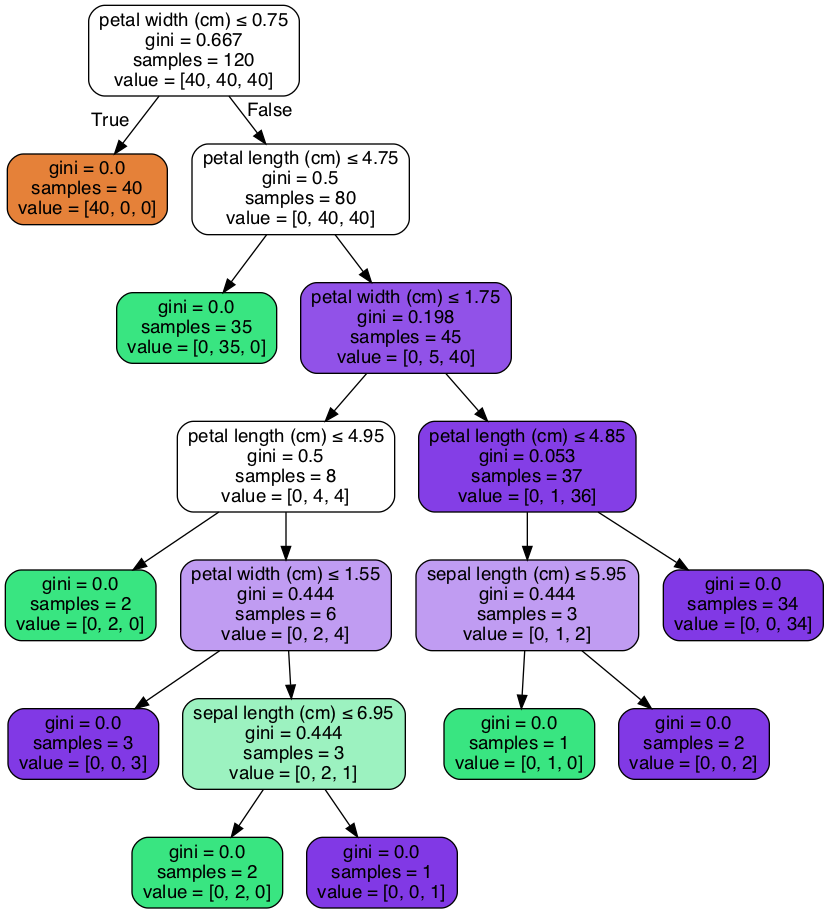

In [11]:
dot_data = StringIO()
export_graphviz(classifier,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=iris.feature_names
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

#### Check Gini values

In [12]:
def gini(value):
    total = np.sum(value)
    return 1-np.sum((value/total)**2)

In [13]:
gini([40, 40, 40])

0.6666666666666667

In [14]:
gini([40, 0, 0])

0.0

In [15]:
gini([0, 40, 40])

0.5

In [16]:
gini([0, 1, 36])

0.0525931336742147

### Regression tree

#### Interpreting the information in the nodes

- First line is the condition used to split that node (go left if true, go right if false)
- `samples` is the number of observations in that node before splitting
- `mse` is the mean squared error calculated by comparing the actual target values in that node against the mean target value (`value`) in that node
- `value` is the mean target value in that node
- Colors indicate the level of purity

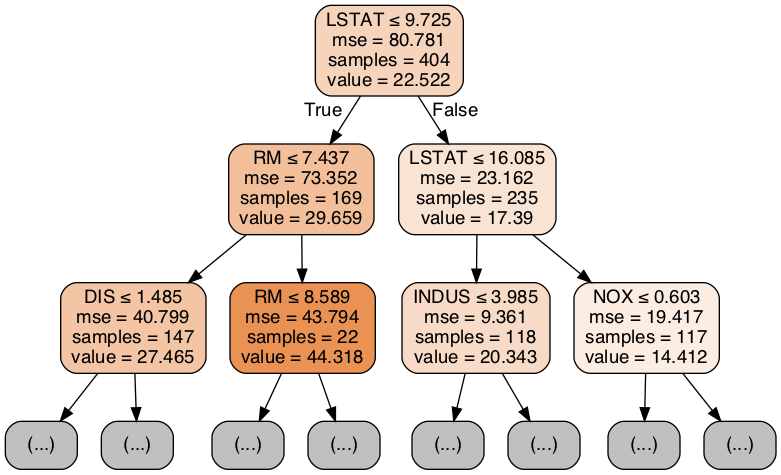

In [17]:
dot_data = StringIO()
export_graphviz(regressor,
                out_file=dot_data,
                max_depth=2,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=boston.feature_names
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

#### Check a few of the MSEs and predicted values

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
def node_mse(subset):
    mean_value = subset.mean()
    predicted_value = np.repeat(mean_value, len(subset))
    mse = mean_squared_error(subset, predicted_value)
    print(mean_value, mse)

In [20]:
subset = y_train
node_mse(subset)

22.52227722772277 80.7813849132438


In [21]:
condition_1 = (X_train[:, list(boston.feature_names).index('LSTAT')] <= 9.725)

subset = y_train[condition_1]
node_mse(subset)

29.658579881656806 73.35177549805678


In [22]:
condition_2 = (X_train[:, list(boston.feature_names).index('RM')] <= 7.437)

subset = y_train[condition_1 & condition_2]
node_mse(subset)

27.464625850340134 40.799428941644685


## Regression trees and varying depth

We will illustrate how decision trees can be used to fit curves and how setting the maximal depth will impact the quality of the fit.

In [23]:
# We will make some data for these functions of 100 points of x from 0.1 to 10:
#
# 1. The general log function for x
# 2. The sin function
# 3. The exponential function
# 4. The x**2 function
#


def make_data(points=100):
    x = np.linspace(0.1, 10, points)

    data = {
        'x': x,
        'ygenlog': stats.genlogistic.pdf(x, 20)*500 + np.random.normal(0, 2, size=points),
        'ysin': np.sin(x)*20 + np.random.normal(0, 2, size=points),
        'yexp': np.exp(x/1.3) + np.random.normal(0, 2, size=points),
        'ysq': (x-5)**2 + np.random.normal(0, 1, size=points)
    }

    return data


# The data is put into a dictionary for convenience:
d = make_data()
x = d['x']

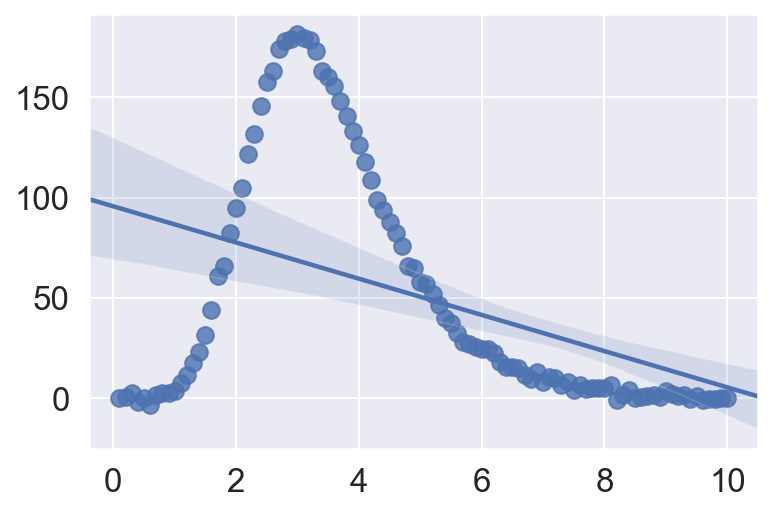

In [24]:
fig = plt.figure()
sns.regplot(x=x, y=d['ygenlog'], scatter_kws={'s': 70})
plt.show()

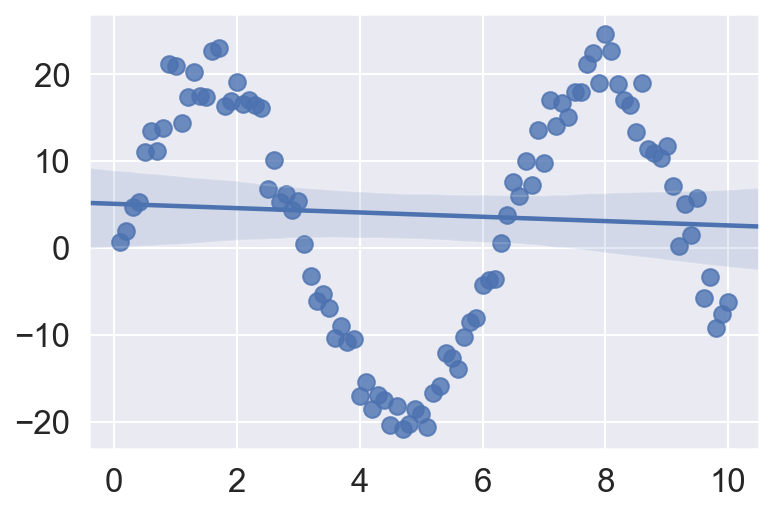

In [25]:
fig = plt.figure()
sns.regplot(x=x, y=d['ysin'], scatter_kws={'s': 70})
plt.show()

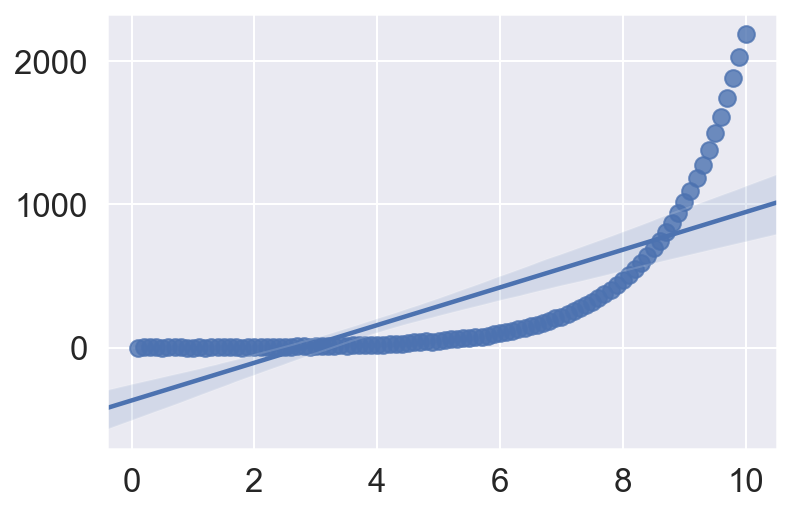

In [26]:
fig = plt.figure()
sns.regplot(x=x, y=d['yexp'], scatter_kws={'s': 70})
plt.show()

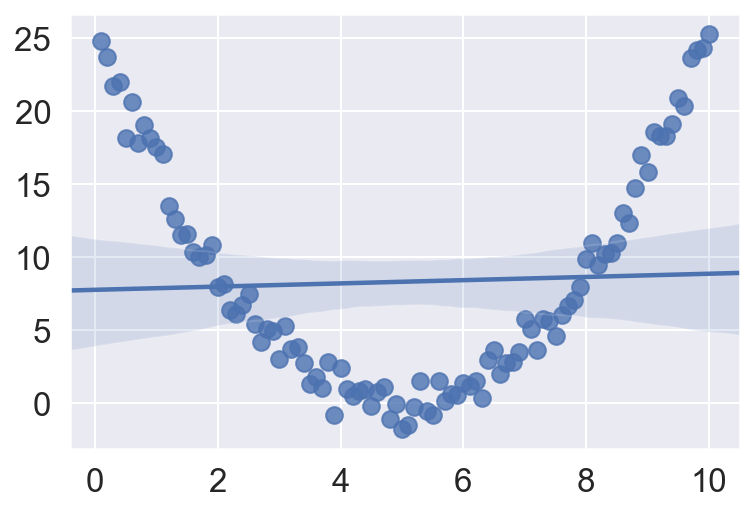

In [27]:
fig = plt.figure()
sns.regplot(x=x, y=d['ysq'], scatter_kws={'s': 70})
plt.show()

In [28]:
# This function builds trees for an x and y predictor and dependent variable from depth 1 to 10.
# (Regression trees)
# Tree predictions are put into a dictionary:
#


def build_tree_models(x, y, tree_depth_range=range(1, 11)):
    tree_model_ypreds = {}

    for i in tree_depth_range:
        model = DecisionTreeRegressor(max_depth=i)
        model.fit(x[:, np.newaxis], y)
        tree_model_ypreds[i] = model.predict(x[:, np.newaxis])

    return tree_model_ypreds

# A function to iterate through our data dictionary of different functions and build the tree models:
#


def fit_trees(data_dict):
    trees_dict = {}
    x = data_dict['x']
    for label, ys in data_dict.items():
        if not label == 'x':
            tree_ys = build_tree_models(x, ys)
            trees_dict[label] = tree_ys

    return trees_dict


tr = fit_trees(d)

In [29]:
# This function plots the x and y data as well as the decision tree decisions for the predicted y:
#


def tree_plotter(d, tr, label, treenum):
    fig = plt.figure(figsize=(8, 6))

    x = d['x']
    y_true = d[label]
    y_pred = tr[label][treenum]

    ax = sns.regplot(x=x, y=y_true, scatter_kws={
                     's': 70}, fit_reg=False, x_ci=None, ci=None)

    ax.plot(x, y_pred, c="#D7B734", linewidth=5)

    ax.set_title('Tree depth: '+str(treenum)+'\n', fontsize=20)

    plt.show()


# Widget inputs code:
#
def tree_plot_vars(function='ysq', treenum=1):
    tree_plotter(d, tr, function, treenum)

In [30]:
widgets.interact(tree_plot_vars,
                 function=['ysq', 'yexp', 'ysin', 'ygenlog'],
                 treenum=widgets.IntSlider(min=1, max=10, step=1, continuous_update=False, value=1))

interactive(children=(Dropdown(description='function', options=('ysq', 'yexp', 'ysin', 'ygenlog'), value='ysq'…

<function __main__.tree_plot_vars(function='ysq', treenum=1)>

In [31]:
# Make a single regression tree model with depth 3 for x**2 function:
#
x = d['x']
y = d['ysq']

dtree = DecisionTreeRegressor(max_depth=20)
dtree.fit(x[:, np.newaxis], y)
dtree.score(x[:, np.newaxis], y)

1.0

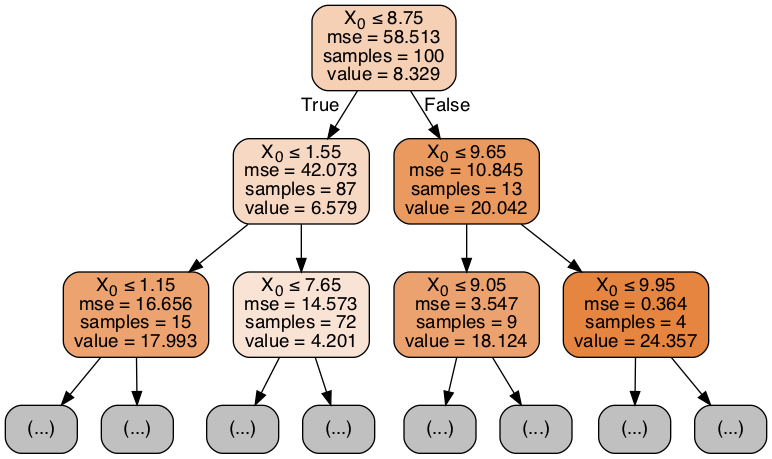

In [32]:
# REQUIREMENTS:
# pip install pydot2
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree,
                out_file=dot_data,
                max_depth=2,
                filled=True,
                rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

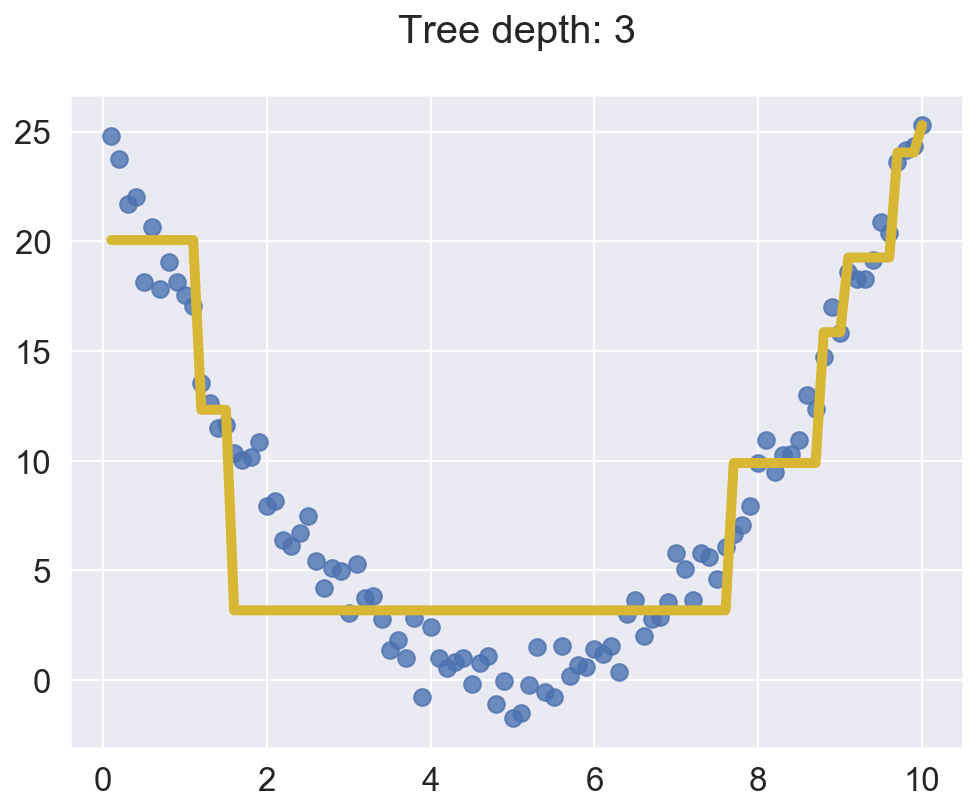

In [33]:
# Plot the decisions for y based on the decision tree DAG above
#
tree_plotter(d, tr, 'ysq', 3)

## Addressing overfitting

---

A stopping criterion determines when to no longer construct further nodes. 

We can stop when all records belong to the same class, or when all records have the same attributes. This *maximizes variance at the expense of bias*, leading to overfitting. 

**Setting a maximum depth:**

A simple way to prevent overfitting is to set a hard limit on the "depth" of the decision tree.

**Minimum observations to make a split:**

An alternative to maximum depth (and can be used at the same time), is to specify the minimum number of datapoints reqired to make a split at a node.


## CART advantages
---

- Simple to understand and interpret. People are able to understand decision tree models after a brief explanation.
    - Useful to work with non technical departments (marketing/sales).
- Requires little data preparation. 
    - Other techniques often require data normalization, dummy variables need to be created and blank values to be removed.
- Able to handle both numerical and categorical data. 
    - Other techniques are usually specialized in analyzing datasets that have only one type of variable.
- Uses a **white box** model.
    - If a given situation is observable in a model the explanation for the condition is easily explained by boolean logic.
    - By contrast, in a **black box** model, the explanation for the results is typically difficult to understand, for example in neural networks.
- Performs well with large datasets. Large amounts of data can be analyzed using standard computing resources in reasonable time.
- Once trained can be implemented on hardware and has extremely fast execution.
    - Real-time applications like trading, for example.

## CART disadvantages
---

- Locally-optimal
    - Practical decision-tree learning algorithms are based on heuristics such as the greedy algorithm where locally-optimal decisions are made at each node. 
    - Such algorithms cannot guarantee to return the globally-optimal decision tree.
- Overfitting
    - Decision-tree learners can create over-complex trees that do not generalize well from the training data.
- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.